<a href="https://colab.research.google.com/github/GJ-007-sage/Astronomy/blob/KCAP/KCAP__python_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a short assignment on basics on torch. Before you start make sure that you are using the T4 GPU as runtime on google colab. Also note that, the free version of google colab only allows one GPU runtime per account at a given time.

General principles: (for freshies)

* For any piece of software that you use, you are NOT expected to remember all the details of the software. For example, if you use python, you may remember the syntax for very frequently used features such as loops/conditionals etc but you won't be expected to remember the syntax of scipy's curve fit module.
* If you do not no the syntax of any task, first step is to search for it on stackoverflow (directly do a google search, you will get some stackoverflow etc search results). If the results are not satisfactory, try using chatGPT or google bard (Caution: the AI search tools tend to hallucinate and create their own answers for some prompts).
* You can also go through the documentation of the module/library/software to find the functionality that you need.

Here are links to documentation of some useful python libraries:
* [numpy](https://numpy.org/doc/stable/)
* [matplotlib](https://matplotlib.org/stable/index.html)
* [pytorch](https://pytorch.org/docs/stable/index.html)
* [pandas](https://pandas.pydata.org/docs/)

In [1]:
!pip install torch
!pip install matplotlib
!pip install numpy
!pip install pandas

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

You can check the specs of GPU alloted to you using the nvidia-smi command. Mind, you this command works only on devices with NVIDIA CUDA support. Since colab uses CUDA, this command works.

In [3]:
!nvidia-smi

Mon Dec 16 04:43:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

As torch is a ML library it supports GPU computation. But numpy does NOT. For torch to use a GPU for computation, you must set the device to 'cuda'.

In [4]:
device = 'cuda'

A tensor for our purposes is just a multi-dimensional array. For example, a vector is a 1D tensor and a matrix is a 2D tensor.

In [5]:
# numpy tensor/ndarray
array = np.array([[1,2,3,4],[5,6,7,8]])
print(array)
print('type :', type(array))
print('shape :', array.shape)

[[1 2 3 4]
 [5 6 7 8]]
type : <class 'numpy.ndarray'>
shape : (2, 4)


In [6]:
# torch tensor
tensor = torch.tensor([[1,2,3,4],[5,6,7,8]], device = device)
print(tensor)
print('type :', type(tensor))
print('shape :', tensor.shape)
print('device :', tensor.device)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]], device='cuda:0')
type : <class 'torch.Tensor'>
shape : torch.Size([2, 4])
device : cuda:0


Binary operations cannot be used on torch.tensors which are stores on different devices.

In [7]:
# this gives an error
A = torch.tensor([[1,2,3,4],[5,6,7,8]], device = 'cpu')
B = torch.tensor([[1,2,3,4],[5,6,7,8]], device = 'cuda')
C = A + B
print(C)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

The error occurs because PyTorch requires tensors to be on the same device for operations like addition. To ensure the result is on the GPU (cuda), you should move tensor A to the GPU before the operation.

Correct the code in the above cell. The array C should be on 'cuda'.

In [8]:
import torch

# Ensure both tensors are on the same device
A = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]], device='cuda')
B = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]], device='cuda')

C = A + B
print(C)

tensor([[ 2,  4,  6,  8],
        [10, 12, 14, 16]], device='cuda:0')


Why is it that people use libraries like numpy and torch? You could always write equivalent python code and work with it. Right? Obviously, the answer is....

In [9]:
l_python = [i for i in range(10000)]
l_numpy = np.array(l_python)

import time

In [10]:
t0 = time.time()
for i in range(10):
  for j,element in enumerate(l_python):
    l_python[j] = element*element
t = time.time()
print('python :', t - t0)

python : 0.2753441333770752


In [11]:
t0 = time.time()
for i in range(10):
  l_numpy = l_numpy*l_numpy
t = time.time()
print('numpy :', t - t0)

numpy : 0.001325845718383789


See the difference! The main reason for this difference is that numpy doesn't simply use the regular python functionalities, it uses a C backend. I won't elaborate on this (because I haven't researched on this enough). Basically in libraries like numpy python is just an interface between the programmer and the actual backend. This is a trend that is followed in various domains of computer science, python is used as an interface between programmer and backend because python is easy to use.

In [12]:
t0 = time.time()
for i in range(10):
  for j,element in enumerate(l_numpy):
    l_numpy[j] = element*element
t = time.time()
print('numpy with loops :', t - t0)

numpy with loops : 0.06714105606079102


<ipython-input-12-83e9c26a2191>:4: RuntimeWarning: overflow encountered in scalar multiply
  l_numpy[j] = element*element


What is this? Using for loops with a numpy array leads to a very significant slowdown. This is because of the way numpy is implemented. Numpy and torch are made for vectorized operations. To put simply, for/while loops are banned!

A lot of the regular coding (using loops) that we do with arrays has an equivalent vectorized version. Lets see some of that.

Task 1:

Create a 4D numpy array with (4,2,5,6) indices in the four dimensions. All the elements of the array must be 1s. Also create a similar torch tensor.

In [13]:
# Create a 4D NumPy array with all elements as 1
array = np.ones((4, 2, 5, 6))
print("NumPy 4D Array:")
print(array)



# Create a 4D PyTorch tensor with all elements as 1
tensor = torch.ones((4, 2, 5, 6))
print("PyTorch 4D Tensor:")
print(tensor)


NumPy 4D Array:
[[[[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]]


 [[[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]]


 [[[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]]


 [[[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]]]
PyTorch 4D Tensor:
tensor([[[[1., 1., 1.,

np.ones: A NumPy function that creates an array filled with the value 1.

torch.ones(*size, dtype=None, device=None, requires_grad=False)

In PyTorch, you use torch.ones() to create a tensor filled with 1s, similar to NumPy's np.ones()



Task 2:

Vectorize the following code

In [14]:
# vectorize this:
l = [1 for i in range(20)]
for i, element in enumerate(l):
  l[i] = element + 10
# end

l# here l is a list

[11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11]

In [15]:
#2
l = np.ones(20, dtype=int)
l += 10

print(l)

[11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11]


if not mentioned the data type, Each element would be a floating-point number rather than an integer.

Task 3:

Vectorize the following code

In [16]:

np.random.seed(0)
N = [i for i in range(10)]
A = np.random.choice(N, size = (10,5))
B = np.random.choice(N, size = (5))
C = np.random.choice(N, size = (10))

# vectorize this
for j in range(10):
  for i in range(5):
    A[j][i] += B[i]
for i in range(5):
  for j in range(10):
    A[j][i] += C[j]
# end

A

array([[13, 12, 16, 16, 21],
       [13, 11, 14, 11, 14],
       [ 8, 11, 14, 14,  8],
       [10, 15, 16, 17, 11],
       [14, 22, 22, 23, 19],
       [11, 12, 16, 18, 14],
       [ 3,  8, 14,  7, 10],
       [ 4,  8, 13,  6,  8],
       [16, 20, 12, 16, 20],
       [12, 15, 21, 16, 15]])

np.random.seed(0): Fixes the random number generator to ensure reproducibility. This ensures that the random numbers generated in the subsequent steps are always the same whenever the code is run.

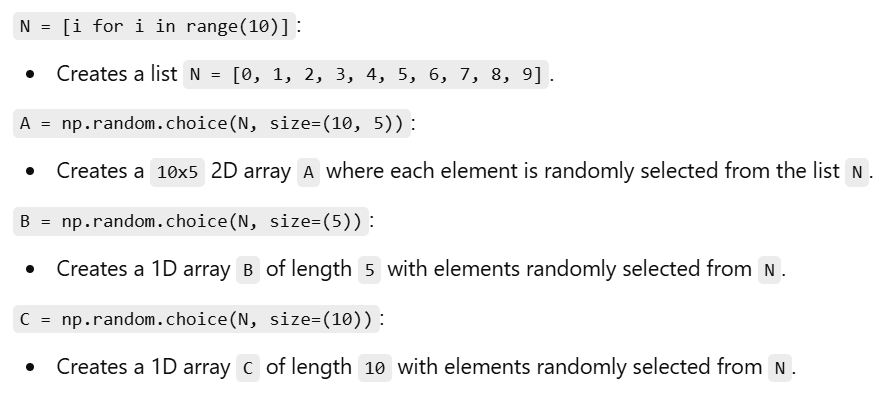

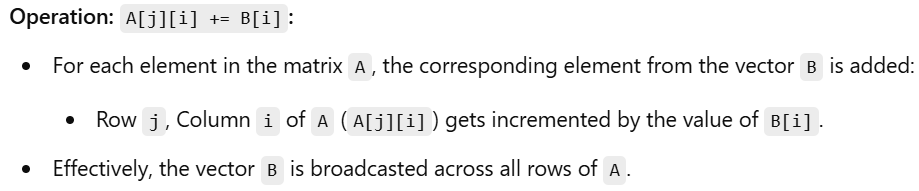

Broadcasting refers to a set of rules in NumPy that allow arrays of different shapes to be used together in arithmetic operations. Instead of explicitly reshaping arrays or using loops to make their shapes compatible, NumPy automatically aligns them in a way that allows element-wise operations to happen efficiently.

In the context of your code, broadcasting allows you to perform operations between arrays (or matrices) of different shapes without needing to manually iterate through their elements.

In [17]:
# 3
np.random.seed(0)
N = [i for i in range(10)]
A = np.random.choice(N, size = (10,5))
B = np.random.choice(N, size = (5))
C = np.random.choice(N, size = (10))
# Vectorized addition
A += B  # Broadcasts B across rows of A
A += C[:, None]  # Broadcasts C across columns of A

print(A)

[[13 12 16 16 21]
 [13 11 14 11 14]
 [ 8 11 14 14  8]
 [10 15 16 17 11]
 [14 22 22 23 19]
 [11 12 16 18 14]
 [ 3  8 14  7 10]
 [ 4  8 13  6  8]
 [16 20 12 16 20]
 [12 15 21 16 15]]


Task 4:

Reshape the following arrays to the sizes mentioned and observe the results.

In [18]:
# 4
np.random.seed(0)
N = [i for i in range(10)]
# (10,5) to (2,5,5)
A1 = np.random.choice(N, size = (10,5))
A1 = np.random.choice(N, size=(10, 5))
A1_reshaped = A1.reshape(2, 5, 5)  # Reshaping (10, 5) to (2, 5, 5)
print("Reshaped A1 (10,5) -> (2,5,5):")
print(A1_reshaped)
# (2,3) to (6,)
A2 = np.random.choice(N, size = (2,3))
A2_reshaped = A2.reshape(6)  # Reshaping (2,3) to (6,)
print("\nReshaped A2 (2,3) -> (6,):")
print(A2_reshaped)
# Get the transpose
A3 = np.random.choice(N, size = (3,4))
A3_transposed = A3.T  # Transposing (3,4) to (4,3)
print("\nTransposed A3 (3,4) -> (4,3):")
print(A3_transposed)

Reshaped A1 (10,5) -> (2,5,5):
[[[0 4 5 5 6]
  [8 4 1 4 9]
  [8 1 1 7 9]
  [9 3 6 7 2]
  [0 3 5 9 4]]

 [[4 6 4 4 3]
  [4 4 8 4 3]
  [7 5 5 0 1]
  [5 9 3 0 5]
  [0 1 2 4 2]]]

Reshaped A2 (2,3) -> (6,):
[0 3 2 0 7 5]

Transposed A3 (3,4) -> (4,3):
[[9 2 3]
 [0 9 2]
 [2 2 3]
 [7 3 4]]


Task 5:

Using numpy or torch library functions, get an identity matrix of size 10.

In [19]:
# 5
# Create an identity matrix of size 10 using NumPy
identity_matrix_np = np.eye(10)
print("Identity Matrix using NumPy:")
print(identity_matrix_np)

# Create an identity matrix of size 10 using PyTorch
identity_matrix_torch = torch.eye(10, dtype=int)
print("Identity Matrix using PyTorch:")
print(identity_matrix_torch)


Identity Matrix using NumPy:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Identity Matrix using PyTorch:
tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])


np.eye(10) creates a 10x10 identity matrix in NumPy, where all diagonal elements are 1, and all off-diagonal elements are 0.
torch.eye(10) creates the same 10x10 identity matrix in PyTorch.

Task 6:

You are given a matrix $A$ of shape (4,5), you want the second half (to be precise, rows 2,3 (with 0 indexing)) of the matrix. Slice the matrix!

In [20]:
A = np.random.choice(N, size = (4,5))
A

array([[1, 2, 9, 1, 4],
       [6, 8, 2, 3, 0],
       [0, 6, 0, 6, 3],
       [3, 8, 8, 8, 2]])

In [21]:
# 6
second_half = A[2:4]  # Slicing from index 1 to 3 (row indices 2 and 3)
print("Second half of the matrix (rows 2, 3):")
print(second_half)

Second half of the matrix (rows 2, 3):
[[0 6 0 6 3]
 [3 8 8 8 2]]


Task 7:

You are given a matrix $A$ of size (4,3). Sum up all the rows of the matrix and store it in $R$. Take average of all the columns of $A$ and store it in $C$. Note that $R$ should be a row matrix and $C$ a column matrix, that is shapes must be (1,3) and (4,1) respectively.

In [22]:
np.random.seed(0)
A = np.random.choice(N, size = (4,3))

# 7

# Sum up all the rows of A and store it in R (row matrix of shape (1, 3))
R = np.sum(A, axis=0, keepdims=True)  # Summing along rows, keepdims=True keeps the shape as (1, 3)

# Take the average of all the columns of A and store it in C (column matrix of shape (4, 1))
C = np.mean(A, axis=1, keepdims=True)  # Averaging along columns, keepdims=True keeps the shape as (4, 1)

print("Matrix A (4, 3):")
print(A)

print("\nSum of all rows (R, shape (1, 3)):")
print(R)

print("\nAverage of all columns (C, shape (4, 1)):")
print(C)


Matrix A (4, 3):
[[5 0 3]
 [3 7 9]
 [3 5 2]
 [4 7 6]]

Sum of all rows (R, shape (1, 3)):
[[15 19 20]]

Average of all columns (C, shape (4, 1)):
[[2.66666667]
 [6.33333333]
 [3.33333333]
 [5.66666667]]


using putorch below


In [23]:
# Given matrix A of size (4, 3)
B = torch.rand((4, 3))  # Example matrix of size (4, 3)

# Sum up all the rows of A and store it in R (row matrix of shape (1, 3))
R = torch.sum(B, dim=0, keepdim=True)  # Summing along rows, keepdim=True keeps the shape as (1, 3)

# Take the average of all the columns of A and store it in C (column matrix of shape (4, 1))
C = torch.mean(B, dim=1, keepdim=True)  # Averaging along columns, keepdim=True keeps the shape as (4, 1)

print("Matrix A (4, 3):")
print(B)

print("\nSum of all rows (R, shape (1, 3)):")
print(R)

print("\nAverage of all columns (C, shape (4, 1)):")
print(C)


Matrix A (4, 3):
tensor([[0.8414, 0.6545, 0.2323],
        [0.7456, 0.1885, 0.3530],
        [0.9092, 0.3474, 0.5673],
        [0.5340, 0.7267, 0.0333]])

Sum of all rows (R, shape (1, 3)):
tensor([[3.0302, 1.9171, 1.1859]])

Average of all columns (C, shape (4, 1)):
tensor([[0.5761],
        [0.4290],
        [0.6080],
        [0.4313]])


Task 8:

Now you have a matrix of shape ($N$,3) with each row $i$ being the coordinates of particle $i$. The aim is to compute the distance matrix that is, a matrix of shape ($N$,$N$) with ($i$,$j$) element being the distance between $i^{th}$ and $j^{th}$ particles.

In [24]:
# hint for 1 D coordinates
np.random.seed(0)
A = np.random.rand(10)

D = A[np.newaxis,:] - A[:,np.newaxis]
D = np.abs(D)
D

array([[0.        , 0.16637586, 0.05394987, 0.00393032, 0.1251587 ,
        0.09708061, 0.11122629, 0.3429595 , 0.41484926, 0.16537199],
       [0.16637586, 0.        , 0.11242599, 0.17030618, 0.29153457,
        0.06929525, 0.27760216, 0.17658363, 0.24847339, 0.33174785],
       [0.05394987, 0.11242599, 0.        , 0.05788019, 0.17910858,
        0.04313074, 0.16517616, 0.28900962, 0.36089938, 0.21932186],
       [0.00393032, 0.17030618, 0.05788019, 0.        , 0.12122838,
        0.10101093, 0.10729597, 0.34688982, 0.41877958, 0.16144166],
       [0.1251587 , 0.29153457, 0.17910858, 0.12122838, 0.        ,
        0.22223931, 0.01393241, 0.4681182 , 0.54000796, 0.04021328],
       [0.09708061, 0.06929525, 0.04313074, 0.10101093, 0.22223931,
        0.        , 0.2083069 , 0.24587889, 0.31776865, 0.26245259],
       [0.11122629, 0.27760216, 0.16517616, 0.10729597, 0.01393241,
        0.2083069 , 0.        , 0.45418579, 0.52607555, 0.05414569],
       [0.3429595 , 0.17658363, 0.2890096

In [27]:
np.random.seed(0)
positions = np.random.rand(10, 3)*1e11  #1e11 scales the value by 10^11 # N=10

# 8
# Step 1: Compute squared differences between particles using broadcasting
differences = positions[:, np.newaxis, :] - positions[np.newaxis, :, :]  # Shape: (N, N, 3)
# coordinates[:, np.newaxis, :] reshapes the matrix to (N,1,3)
# coordinates[np.newaxis, :, :] reshapes the matrix to (1,N,3)

# Step 2: Square the differences and sum along the last axis (x, y, z)
squared_distances = np.sum(differences ** 2, axis=-1)  # Shape: (N, N)

# Step 3: Take the square root to get the Euclidean distance
distance_matrix = np.sqrt(squared_distances)

print("Coordinates (N, 3):")
print(positions)

print("\nDistance Matrix (N, N):")
print(distance_matrix)



Coordinates (N, 3):
[[5.48813504e+10 7.15189366e+10 6.02763376e+10]
 [5.44883183e+10 4.23654799e+10 6.45894113e+10]
 [4.37587211e+10 8.91773001e+10 9.63662761e+10]
 [3.83441519e+10 7.91725038e+10 5.28894920e+10]
 [5.68044561e+10 9.25596638e+10 7.10360582e+09]
 [8.71292997e+09 2.02183974e+09 8.32619846e+10]
 [7.78156751e+10 8.70012148e+10 9.78618342e+10]
 [7.99158564e+10 4.61479362e+10 7.80529176e+10]
 [1.18274426e+10 6.39921021e+10 1.43353287e+10]
 [9.44668917e+10 5.21848322e+10 4.14661940e+10]]

Distance Matrix (N, N):
[[0.00000000e+00 2.94733968e+10 4.16894991e+10 1.96626934e+10
  5.72166929e+10 8.65431077e+10 4.66728373e+10 3.98299002e+10
  6.34103186e+10 4.79024444e+10]
 [2.94733968e+10 0.00000000e+00 5.75868031e+10 4.18602344e+10
  7.63507592e+10 6.38095641e+10 6.03619792e+10 2.90195223e+10
  6.93767534e+10 4.72164080e+10]
 [4.16894991e+10 5.75868031e+10 0.00000000e+00 4.49404524e+10
  9.02743368e+10 9.48472677e+10 3.41591592e+10 5.91121281e+10
  9.15585991e+10 8.33893294e+10]
 [1

In [28]:
# using pytorch


# Example: Coordinates of N particles in a (N, 3) tensor
N = 5
coordinates_2 = torch.rand(N, 3)  # Random tensor of shape (N, 3)

# Compute pairwise distance matrix
differences = coordinates_2[:, None, :] - coordinates_2[None, :, :]  # Shape: (N, N, 3)
squared_distances = torch.sum(differences ** 2, dim=-1)  # Sum of squared differences
distance_matrix_2 = torch.sqrt(squared_distances)  # Euclidean distances

print("Coordinates (N, 3):")
print(coordinates_2)

print("\nDistance Matrix (N, N):")
print(distance_matrix_2)


Coordinates (N, 3):
tensor([[0.0519, 0.5043, 0.1278],
        [0.5945, 0.3175, 0.5698],
        [0.1927, 0.4900, 0.4152],
        [0.1413, 0.2266, 0.9052],
        [0.7727, 0.8665, 0.1758]])

Distance Matrix (N, N):
tensor([[0.0000, 0.7243, 0.3203, 0.8303, 0.8081],
        [0.7243, 0.0000, 0.4638, 0.5712, 0.6989],
        [0.3203, 0.4638, 0.0000, 0.5587, 0.7317],
        [0.8303, 0.5712, 0.5587, 0.0000, 1.1577],
        [0.8081, 0.6989, 0.7317, 1.1577, 0.0000]])


Task 9:

Using the distance matrix computed above, compute the gravitational potential energy of the system as

$$U = -\sum_{i \neq j}^{N} \frac{Gm_im_j}{r_{ij}}$$

Take the masses to be 1 and $G = 1$.

In [29]:
# 9
#exclude the diagonal elements

# Exclude self-distances by setting diagonal to infinity
np.fill_diagonal(distance_matrix, np.inf)

# Compute gravitational potential energy
U = -np.sum(1 / distance_matrix)

print(f"Gravitational potential energy of the system: {U}")

Gravitational potential energy of the system: -1.5779936498679439e-09


In [30]:
#using torch
# Exclude self-distances by setting diagonal to infinity
distance_matrix_2.fill_diagonal_(float('inf'))  # Replace diagonal elements with infinity

# Compute gravitational potential energy
U = -torch.sum(1 / distance_matrix_2)

# Output the result
print(f"Gravitational potential energy of the system: {U.item()}")

Gravitational potential energy of the system: -32.60472106933594


Task 10:

Do tasks 8 and 9 using torch.

In [31]:
#positions = torch.tensor(positions, device = 'cuda', requires_grad = False)

# 10
#Done

Task 11:

What to do if you need to check for some condition? You have an array $A$, replace all the elements less than zero with zero.

In [32]:
# hints

A = np.array([0,1,2,3,4])
print(A[[1,4]])
print(A[[True, False, False, True, True]])

[1 4]
[0 3 4]


you can use boolean masking in NumPy. Boolean masking allows you to filter or modify elements of an array based on a condition.

In [33]:
# 11
A = np.array([0, -1, 2, -3, 4, -5])
A[A < 0] = 0  # Replace all elements less than 0 with 0

print(A)


[0 0 2 0 4 0]


This is the essence of vectorised operations, we can do more complex stuff but lets keep some of it for later.... Before leaving this section, please try to see equivalent functionalites in pytorch as well.

Pandas:

Pandas mostly is used to load, manipulate and store data. In many cases data is stored in '.csv' format. In this format, the data is stored as an array with each row on a different line and each element of a row separated by ','.

Now do the following tasks,

In [34]:
array = np.random.rand(100,5)

# store the array in a csv file named numpy.csv use only numpy for this.
# you can use the numpy.savetxt() function. This function writes an array to a text file in a specified format, which works well for saving CSV files.
np.savetxt("numpy.csv", array, delimiter=",", fmt="%.5f", header="col1,col2,col3,col4,col5", comments='')
print("Array successfully saved to numpy.csv")


Array successfully saved to numpy.csv


In [37]:

data = np.loadtxt("numpy.csv", delimiter=",", skiprows=1)

print("Loaded NumPy Array:")
print(data)

Loaded NumPy Array:
[[0.26456 0.77423 0.45615 0.56843 0.01879]
 [0.61764 0.6121  0.61693 0.94375 0.68182]
 [0.35951 0.43703 0.69763 0.06023 0.66677]
 [0.67064 0.21038 0.12893 0.31543 0.36371]
 [0.5702  0.4386  0.98837 0.10204 0.20888]
 [0.16131 0.65311 0.25329 0.46631 0.24443]
 [0.15897 0.11038 0.65633 0.13818 0.19658]
 [0.36873 0.82099 0.0971  0.83794 0.0961 ]
 [0.97646 0.46865 0.97676 0.60485 0.73926]
 [0.03919 0.28281 0.1202  0.29614 0.11873]
 [0.31798 0.41426 0.06415 0.69247 0.5666 ]
 [0.26539 0.52325 0.09394 0.57595 0.9293 ]
 [0.31857 0.66741 0.1318  0.71633 0.28941]
 [0.18319 0.58651 0.02011 0.82894 0.0047 ]
 [0.67782 0.27001 0.73519 0.96219 0.24875]
 [0.57616 0.59204 0.57225 0.22308 0.95275]
 [0.44713 0.84641 0.69948 0.29744 0.8138 ]
 [0.39651 0.8811  0.58127 0.88174 0.69253]
 [0.72525 0.50132 0.95608 0.64399 0.42386]
 [0.60639 0.01919 0.30157 0.66017 0.29008]
 [0.61802 0.42877 0.13547 0.29828 0.56996]
 [0.59087 0.57433 0.6532  0.6521  0.43142]
 [0.89655 0.36756 0.43586 0.89192 

syntax

np.savetxt(filename, array, delimiter, fmt, header, comments)

filename: "numpy.csv" is the name of the file to save the array.


array: The NumPy array to be saved.

delimiter=",": Specifies that the values in the file will be comma-separated (CSV format).

fmt="%.5f": Specifies the format of each element in the array (5 decimal places here).

header="col1,col2,col3,col4,col5": Adds column names as a header to the CSV file.

comments='': Ensures no additional comment character (#) is added before the header

In [35]:
# store the array in a csv file named pandas.csv. This csv must also have a header. Column i must have heading 'column i'.

columns = [f"column {i+1}" for i in range(array.shape[1])]

# Convert the NumPy array into a Pandas DataFrame
df = pd.DataFrame(array, columns=columns)

# Save the DataFrame to a CSV file with the name 'pandas.csv'
df.to_csv("pandas.csv", index=False)

print("Array successfully saved to pandas.csv with a header!")

Array successfully saved to pandas.csv with a header!


The array.shape[1] gives the number of columns (5 in this case).

f"column {i+1}" generates strings like "column 1", "column 2", ..., "column 5".

In [36]:
# load the data stored in pandas.csv
df = pd.read_csv("pandas.csv")

print("Loaded DataFrame:")
print(df.head())  # Displays the first 5 rows

Loaded DataFrame:
   column 1  column 2  column 3  column 4  column 5
0  0.264556  0.774234  0.456150  0.568434  0.018790
1  0.617635  0.612096  0.616934  0.943748  0.681820
2  0.359508  0.437032  0.697631  0.060225  0.666767
3  0.670638  0.210383  0.128926  0.315428  0.363711
4  0.570197  0.438602  0.988374  0.102045  0.208877


In [38]:
# convert the pandas dataframe to numpy array
# you can use the .to_numpy() method provided by Pandas.

array = df.to_numpy()

#Print the NumPy array
print("Converted NumPy Array:")
print(array)

# Print the shape of the array
print("Shape of the Array:", array.shape)

Converted NumPy Array:
[[0.26455561 0.77423369 0.45615033 0.56843395 0.0187898 ]
 [0.6176355  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672]
 [0.67063787 0.21038256 0.1289263  0.31542835 0.36371077]
 [0.57019677 0.43860151 0.98837384 0.10204481 0.20887676]
 [0.16130952 0.65310833 0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959 0.13818295 0.19658236]
 [0.36872517 0.82099323 0.09710128 0.83794491 0.09609841]
 [0.97645947 0.4686512  0.97676109 0.60484552 0.73926358]
 [0.03918779 0.28280696 0.12019656 0.2961402  0.11872772]
 [0.31798318 0.41426299 0.0641475  0.69247212 0.56660145]
 [0.26538949 0.52324805 0.09394051 0.5759465  0.9292962 ]
 [0.31856895 0.66741038 0.13179786 0.7163272  0.28940609]
 [0.18319136 0.58651293 0.02010755 0.82894003 0.00469548]
 [0.67781654 0.27000797 0.73519402 0.96218855 0.24875314]
 [0.57615733 0.59204193 0.57225191 0.22308163 0.95274901]
 [0.44712538 0.84640867 0.69947928 0.29743695 0.8

In [39]:
# add 1 to all the elements of the numpy array

array += 1

# Print the modified array
print("Modified NumPy Array:")
print(array)

Modified NumPy Array:
[[1.26455561 1.77423369 1.45615033 1.56843395 1.0187898 ]
 [1.6176355  1.61209572 1.616934   1.94374808 1.6818203 ]
 [1.3595079  1.43703195 1.6976312  1.06022547 1.66676672]
 [1.67063787 1.21038256 1.1289263  1.31542835 1.36371077]
 [1.57019677 1.43860151 1.98837384 1.10204481 1.20887676]
 [1.16130952 1.65310833 1.2532916  1.46631077 1.24442559]
 [1.15896958 1.11037514 1.65632959 1.13818295 1.19658236]
 [1.36872517 1.82099323 1.09710128 1.83794491 1.09609841]
 [1.97645947 1.4686512  1.97676109 1.60484552 1.73926358]
 [1.03918779 1.28280696 1.12019656 1.2961402  1.11872772]
 [1.31798318 1.41426299 1.0641475  1.69247212 1.56660145]
 [1.26538949 1.52324805 1.09394051 1.5759465  1.9292962 ]
 [1.31856895 1.66741038 1.13179786 1.7163272  1.28940609]
 [1.18319136 1.58651293 1.02010755 1.82894003 1.00469548]
 [1.67781654 1.27000797 1.73519402 1.96218855 1.24875314]
 [1.57615733 1.59204193 1.57225191 1.22308163 1.95274901]
 [1.44712538 1.84640867 1.69947928 1.29743695 1.81

In [40]:
# store the array to pandas_1.csv. This csv must also have a header. Column i must have heading 'column i'.

df = pd.DataFrame(array)

# Set custom column headers 'column 1', 'column 2', ..., 'column n'
df.columns = [f"column {i+1}" for i in range(df.shape[1])]

# Store the DataFrame to a CSV file with headers
df.to_csv("pandas_1.csv", index=False)

print("Data stored in 'pandas_1.csv' with headers.")

Data stored in 'pandas_1.csv' with headers.


Task 12:
    This is just to brush up/learn the basics of matplotlib.
Make an animation of a particle moving in a circle with radius 1. The particle should start at (1,0) and move in the anticlockwise direction. The animation should be for 10 seconds. The particle should move with a constant speed. The animation should be in 2D.

bonus: You can also try making it in 3D, change it into an ellipse etc.

In [41]:
# we can use matplotlib.animation to animate the movement.

<ipython-input-44-b0bdee6cd8aa>:30: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  particle.set_data(x, y)


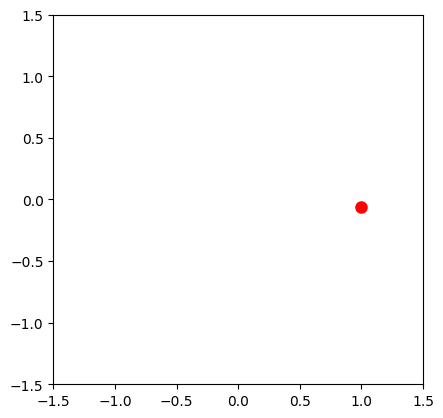

In [44]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#write your code and save it in a file named plot.py

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal', 'box')

# Create a point for the particle
particle, = ax.plot([], [], 'ro', markersize=8)

# Define the function to initialize the animation
def init():
    particle.set_data([], [])
    return particle,

# Define the update function for the animation
def update(frame):
    # Angle changes with constant speed
    angle = 2 * np.pi * frame / 100  # Full circle (2*pi) over 100 frames
    x = np.cos(angle)  # x-coordinate
    y = np.sin(angle)  # y-coordinate
    particle.set_data(x, y)
    return particle,

# Create the animation
ani = animation.FuncAnimation(
    fig, update, frames=range(100), init_func=init, blit=True, interval=100, repeat=True
)

# Display the animation using HTML
HTML(ani.to_jshtml())  # Use this line to render the animation in Google Colab


ax.plot([], [], 'ro', markersize=8)

ax.plot(): This is the matplotlib function used to plot data on the axis ax.

[] and []: The empty lists [] are placeholders for the initial data for the x and y coordinates. Since the particle hasn't moved yet, no initial position is provided.

'ro': This specifies the style of the plot:

'r' stands for "red," so the particle will be colored red.

'o' specifies that the marker should be a circle.

markersize=8: This sets the size of the particle (red dot). The value 8 controls the size of the circle marker.

particle, = ...

The ax.plot() function returns a tuple containing the line or plot objects. However, in this case, we are plotting a single marker (the particle), so we extract that object by assigning it to the variable particle.

The comma (,) is important here because ax.plot() returns a tuple even for a single plot object, and the comma is used to unpack the tuple. This ensures that the variable particle directly holds the plot object for the red circle, which can be updated later.

FuncAnimation ties everything together to create the animation:

It takes the figure (fig) to render on.

It repeatedly calls the update function to animate the particle.

It uses 100 frames, initialized by init().

With blit=True, it optimizes the redraw process.

The animation updates every 100 milliseconds (10 frames per second).





